

# Project: Investigate a Dataset - [TMDb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>   
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> Brief Description of each column in the dataset

> **1.id** - Unique id's for each row

> **2.imdb_id** - System generated unique id

> **3.popularity** - popularity score 

> **4.budget** - budget in dollars

> **5.revenue** - revenue in dollars

> **6.original_title** - Movie title

> **7.cast** - cast performed in movie

> **8.homepage** - website link of movie

> **9.director** - director name

> **10.tagline** - tagline of movie

> **11.keywords** - words used to give significant idea

> **12.overview** - general review of movie

> **13.runtime** - movie duration in seconds

> **14.genres** - categories of movie

> **15.production_companies** - company name which manages a movie process from start to finish

> **16.release_date** - movie releasing date

> **17.vote_count** - votes given by viewers

> **18.vote_average** - average votes given by viewers

> **19.release_year** - movie releasing year

> **20.budget_adj**-budget in 2010 dollars,accounting for inflation

> **21.revenue_adj** -revenue in 2010 dollars,accounting for inflation


### Question(s) for Analysis


<ul>
   
  
<li><a href="#q1">**1.Which movie genres are made the most?**</a></li>


<li><a href="#q2">**2. Top 10 actors?**</a></li>


<li><a href="#q3">**3.Top 10 Production Compaines ?**</a></li>


<li><a href="#q4">**4.In which year most of the movies released?**</a></li>


<li><a href="#q5">**5. Which month has the highest release of movies?**</a></li>


<li><a href="#q6">**6. Top 10 directors ?.**</a></li>


<li><a href="#q7">**7.Most 10 frequent runtime?**</a></li>


<li><a href="#q8">**8.Min. and Max. runtime?**</a></li>


<li><a href="#q9">**9.Highest and Lowest profit movie?**</a></li>


<li><a href="#q10">**10.Highest and Lowest budget movie?**</a></li>


<li><a href="#q11">**11.Highest and Lowest revenue movie?**</a></li>


<li><a href="#q12">**12.Highest and Lowest vote movie?**</a></li>


<li><a href="#q13">**13.Which year has the highest profit?**</a></li>


<li><a href="#q14">**14.What kinds of properties are associated with movies that have high revenues?

# Import all required packages.

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Upgrade pandas to use dataframe.explode() function. 

In [3]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling




### General Properties


# Load data

In [5]:
df = pd.read_csv('tmdb-movies.csv')

# Print the first 2 rows of df

In [6]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


# Print DataFrame statistics

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# Convert release_date column to datetime

In [9]:
df['release_date'] = pd.to_datetime(df['release_date'])

# confirm the new data type for release_date

In [10]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

### Data Cleaning


# Remove unnessary columns

In [11]:
Removed_Columns = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj']
df.drop(Removed_Columns, axis=1, inplace=True)
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


# Re-arrange columns

In [12]:
ordered_columns = ['original_title', 'release_year','release_date', 'runtime', 'genres', 'cast', 'director', 'production_companies', 'vote_count', 'vote_average', 'popularity', 'budget', 'revenue']
df = df.reindex(columns = ordered_columns)
df.head(2)

,original_title,release_year,release_date,runtime,genres,cast,director,production_companies,vote_count,vote_average,popularity,budget,revenue
0,Jurassic World,2015,2015-06-09,124,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,32.985763,150000000,1513528810
1,Mad Max: Fury Road,2015,2015-05-13,120,Action|Adventure|Science Fiction|Thriller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,28.419936,150000000,378436354


# Search for any missing data in selected columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
original_title          10866 non-null object
release_year            10866 non-null int64
release_date            10866 non-null datetime64[ns]
runtime                 10866 non-null int64
genres                  10843 non-null object
cast                    10790 non-null object
director                10822 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.1+ MB


# Check for duplicated rows

In [14]:
df.duplicated().sum()

1

# Know which row is duplicated

In [15]:
df[df.duplicated()]

,original_title,release_year,release_date,runtime,genres,cast,director,production_companies,vote_count,vote_average,popularity,budget,revenue
2090,TEKKEN,2010,2010-03-20,92,Crime|Drama|Action|Thriller|Science Fiction,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Namco|Light Song Films,110,5.0,0.59643,30000000,967000


# Drop duplicated row

In [16]:
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
original_title          10865 non-null object
release_year            10865 non-null int64
release_date            10865 non-null datetime64[ns]
runtime                 10865 non-null int64
genres                  10842 non-null object
cast                    10789 non-null object
director                10821 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.2+ MB


# Check for null values

In [17]:
df.isnull().sum()

original_title             0
release_year               0
release_date               0
runtime                    0
genres                    23
cast                      76
director                  44
production_companies    1030
vote_count                 0
vote_average               0
popularity                 0
budget                     0
revenue                    0
dtype: int64

# Remove rows with null values

In [18]:
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
original_title          9772 non-null object
release_year            9772 non-null int64
release_date            9772 non-null datetime64[ns]
runtime                 9772 non-null int64
genres                  9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
production_companies    9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.0+ MB


# Check the new data shape

In [20]:
df.shape

(9772, 13)

# Our dataset contains lots of values separted by '|'. We need to get rid of '|' for better analysis.

In [21]:
def separate(data):
    return data.str[0:].str.split('|',expand = True)
genres = separate(df['genres'])
cast = separate(df['cast'])
production_companies = separate(df['production_companies'])

# Create a copy of 'genre' column

In [22]:
df_genre_copy = df.copy()

# Convert to array

In [23]:
df_genre_copy['genres'] = df_genre_copy.genres.str.split('|')

# We will use explode function to transform each element of a list-like to a row, replicating index values

In [24]:
df_genre_separated = df_genre_copy.explode('genres')

# Save csv file for future reference

In [25]:
genres.to_csv('genres.csv',index = False)

# Print the first 5 rows

In [26]:
df_genre_separated.head()

,original_title,release_year,release_date,runtime,genres,cast,director,production_companies,vote_count,vote_average,popularity,budget,revenue
0,Jurassic World,2015,2015-06-09,124,Action,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,32.985763,150000000,1513528810
0,Jurassic World,2015,2015-06-09,124,Adventure,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,32.985763,150000000,1513528810
0,Jurassic World,2015,2015-06-09,124,Science Fiction,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,32.985763,150000000,1513528810
0,Jurassic World,2015,2015-06-09,124,Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,32.985763,150000000,1513528810
1,Mad Max: Fury Road,2015,2015-05-13,120,Action,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,28.419936,150000000,378436354


# Create a copy of 'cast' column

In [27]:
df_cast_copy = df.copy()

# Convert to array

In [28]:
df_cast_copy['cast'] = df_genre_copy.cast.str.split('|')

# We will use explode function to transform each element of a list-like to a row, replicating index values

In [29]:
df_cast_separated = df_cast_copy.explode('cast')

# Save csv file for future reference

In [30]:
cast.to_csv('cast.csv',index = False)

# Print the first 5 rows

In [31]:
df_cast_separated.head()

,original_title,release_year,release_date,runtime,genres,cast,director,production_companies,vote_count,vote_average,popularity,budget,revenue
0,Jurassic World,2015,2015-06-09,124,Action|Adventure|Science Fiction|Thriller,Chris Pratt,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,32.985763,150000000,1513528810
0,Jurassic World,2015,2015-06-09,124,Action|Adventure|Science Fiction|Thriller,Bryce Dallas Howard,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,32.985763,150000000,1513528810
0,Jurassic World,2015,2015-06-09,124,Action|Adventure|Science Fiction|Thriller,Irrfan Khan,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,32.985763,150000000,1513528810
0,Jurassic World,2015,2015-06-09,124,Action|Adventure|Science Fiction|Thriller,Vincent D'Onofrio,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,32.985763,150000000,1513528810
0,Jurassic World,2015,2015-06-09,124,Action|Adventure|Science Fiction|Thriller,Nick Robinson,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,32.985763,150000000,1513528810


# Create a copy of 'production_companies' column

In [32]:
df_production_companies_copy = df.copy()

# Convert to array

In [33]:
df_production_companies_copy['production_companies'] = df_production_companies_copy.production_companies.str.split('|')

# We will use explode function to transform each element of a list-like to a row, replicating index values

In [34]:
df_production_companies_separated = df_production_companies_copy.explode('production_companies')

# Save csv file for future reference

In [35]:
production_companies.to_csv('production_companies.csv',index = False)

# Print the first 5 rows

In [36]:
df_production_companies_separated.head()

,original_title,release_year,release_date,runtime,genres,cast,director,production_companies,vote_count,vote_average,popularity,budget,revenue
0,Jurassic World,2015,2015-06-09,124,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios,5562,6.5,32.985763,150000000,1513528810
0,Jurassic World,2015,2015-06-09,124,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Amblin Entertainment,5562,6.5,32.985763,150000000,1513528810
0,Jurassic World,2015,2015-06-09,124,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Legendary Pictures,5562,6.5,32.985763,150000000,1513528810
0,Jurassic World,2015,2015-06-09,124,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Fuji Television Network,5562,6.5,32.985763,150000000,1513528810
0,Jurassic World,2015,2015-06-09,124,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Dentsu,5562,6.5,32.985763,150000000,1513528810


# Print the new shape

In [37]:
df_genre_separated.shape , df_cast_separated.shape , df_production_companies_separated.shape 

((24650, 13), (48020, 13), (23143, 13))

# Check if dataframe has zero elemens

In [38]:
df.eq(0).any().any()

True

# creates a boolean dataframe which is True where df is nonzero and print the first 5 rows from it

In [39]:
df.head() != 0

,original_title,release_year,release_date,runtime,genres,cast,director,production_companies,vote_count,vote_average,popularity,budget,revenue
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True


# Remove rows with zero values.

In [40]:
df = df[(df != 0).all(1)]
df.head()

,original_title,release_year,release_date,runtime,genres,cast,director,production_companies,vote_count,vote_average,popularity,budget,revenue
0,Jurassic World,2015,2015-06-09,124,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,32.985763,150000000,1513528810
1,Mad Max: Fury Road,2015,2015-05-13,120,Action|Adventure|Science Fiction|Thriller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,28.419936,150000000,378436354
2,Insurgent,2015,2015-03-18,119,Adventure|Science Fiction|Thriller,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,13.112507,110000000,295238201
3,Star Wars: The Force Awakens,2015,2015-12-15,136,Action|Adventure|Science Fiction|Fantasy,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,11.173104,200000000,2068178225
4,Furious 7,2015,2015-04-01,137,Action|Crime|Thriller,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Universal Pictures|Original Film|Media Rights ...,2947,7.3,9.335014,190000000,1506249360


# Print the new shape

In [41]:
df.shape

(3805, 13)

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1
<a id='q1'></a>
> ### 1.Which movie genres are made the most? 

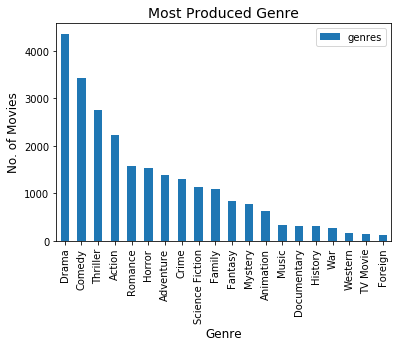

In [42]:
df_genre_separated['genres'].value_counts().plot(kind='bar')
plt.title("Most Produced Genre",fontsize = 14)
plt.xlabel('Genre',fontsize = 12)
plt.ylabel('No. of Movies',fontsize = 12)
plt.legend();

### As we can see Drama movies genre are made most of the times.

### Research Question 2




<a id='q2'></a>
> ### 2. Top 10 actors?

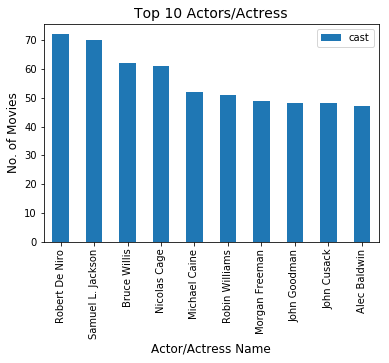

In [43]:
df_cast_separated['cast'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Actors/Actress",fontsize = 14)
plt.xlabel('Actor/Actress Name',fontsize = 12)
plt.ylabel('No. of Movies',fontsize = 12)
plt.legend();

### Roberto De Niro is the most actor that appears in more than 70 movies.

### Research Question 3




<a id='q3'></a>
> ### 3.Top 10 Production Companies?

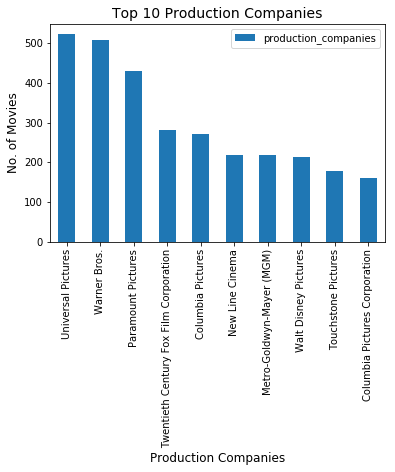

In [44]:
df_production_companies_separated['production_companies'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Production Companies",fontsize = 14)
plt.xlabel('Production Companies',fontsize = 12)
plt.ylabel('No. of Movies',fontsize = 12)
plt.legend();

### Universal Pictures produced more than 500 movies..

### Research Question 4




<a id='q4'></a>
> ### 4.In which year most of the movies released?

In [45]:
df['release_year'].value_counts().head(10)

2011    196
2013    179
2010    177
2009    170
2006    168
2014    165
2008    161
2015    160
2007    159
2005    159
Name: release_year, dtype: int64

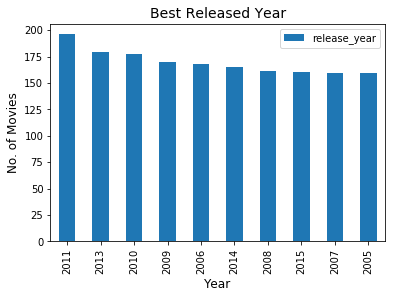

In [46]:
df['release_year'].value_counts().head(10).plot(kind='bar')
plt.title("Best Released Year",fontsize = 14)
plt.xlabel('Year',fontsize = 12)
plt.ylabel('No. of Movies',fontsize = 12)
plt.legend();

### We have 196 movies released during 2011 which is considered highest number in all years within our study timeframe.

### Research Question 5




<a id='q5'></a>
> ### 5.Which month has the highest release of movies?

# Get Month and Day from release_date

In [47]:
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.weekday_name

In [48]:
df['release_month'].value_counts().head(12)

9     452
12    411
10    360
6     339
8     334
7     308
11    302
5     290
3     277
4     261
2     252
1     219
Name: release_month, dtype: int64

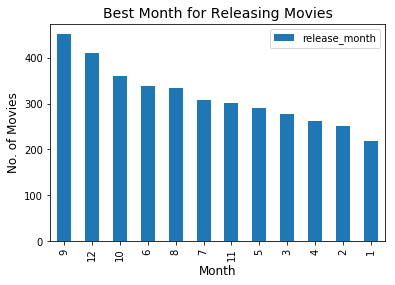

In [49]:
df['release_month'].value_counts().head(12).plot(kind='bar')
plt.title("Best Month for Releasing Movies",fontsize = 14)
plt.xlabel('Month',fontsize = 12)
plt.ylabel('No. of Movies',fontsize = 12)
plt.legend();

### September is considered most month for releasing movies with 452 movies released during that month.

### Research Question 6




<a id='q6'></a>
> ### 6.Top 10 directors?

In [50]:
df['director'].value_counts().head(10)

Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Martin Scorsese      17
Steven Soderbergh    17
Tim Burton           16
Renny Harlin         15
Oliver Stone         15
Brian De Palma       15
Name: director, dtype: int64

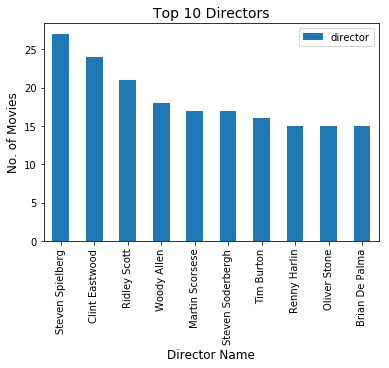

In [51]:
df['director'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Directors",fontsize = 14)
plt.xlabel('Director Name',fontsize = 12)
plt.ylabel('No. of Movies',fontsize = 12)
plt.legend();

### Steven Spielberg is most director with 27 movies.

### Research Question 7




<a id='q7'></a>
> ### 7.Most 10 frequent runtime?

In [52]:
df['runtime'].value_counts().head(10)

100    124
97     110
98     102
93     100
95      99
106     94
90      93
104     93
96      93
99      92
Name: runtime, dtype: int64

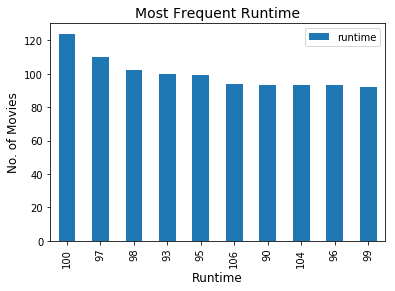

In [53]:
df['runtime'].value_counts().head(10).plot(kind='bar')
plt.title("Most Frequent Runtime",fontsize = 14)
plt.xlabel('Runtime',fontsize = 12)
plt.ylabel('No. of Movies',fontsize = 12)
plt.legend();

### Most frequent movie runtime is 100 minutes and we have 124 movies with that runtime.

### Research Question 8




<a id='q8'></a>
> ### 8.Min. and Max. runtime?

In [54]:
df['runtime'].min()

15

In [55]:
df['runtime'].max()

338

### Research Question 9




<a id='q9'></a>
> ### 9.Highest and Lowest profit movie?

In [56]:
# Calculate Profit for each movie

df['Profit'] = df['revenue'] - df['budget']

# Use the function 'idmin' to find the index of lowest profit movie.
# Use the function 'idmax' to find the index of Highest profit movie.


def minmax(x):
    min_index = df[x].idxmin()
    high_index = df[x].idxmax()
    
    
    # Print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    
#call the find_minmax function.
minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


### Research Question 10




<a id='q10'></a>
> ### 10.Highest and Lowest budget movie?

In [57]:
minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Lost & Found


### Research Question 11




<a id='q11'></a>
> ### 11.Highest and Lowest revenue movie?

In [58]:
minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Shattered Glass


### Research Question 12




<a id='q12'></a>
> ### 12.Highest and Lowest vote movie?

In [59]:
minmax('vote_average')

Movie Which Has Highest vote_average :  The Shawshank Redemption
Movie Which Has Lowest vote_average  :  Foodfight!


### Research Question 13




<a id='q13'></a>
> ### 13.Which Year Has The Highest Profit?

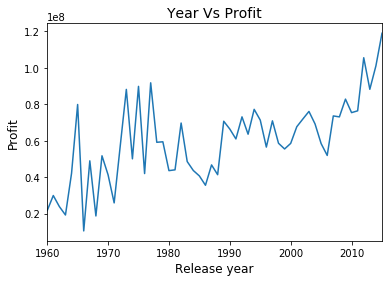

In [60]:
df.groupby('release_year')['Profit'].mean().plot()
plt.title("Year Vs Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 12)
plt.ylabel('Profit',fontsize = 12);

### Research Question 14




<a id='q14'></a>
> ### 14.What kinds of properties are associated with movies that have high revenues?

In [61]:
info = pd.DataFrame(df['revenue'].sort_values(ascending=False))
for i in ordered_columns:
    info[i] = df[i]
info.head()

,revenue,original_title,release_year,release_date,runtime,genres,cast,director,production_companies,vote_count,vote_average,popularity,budget
1386,2781505847,Avatar,2009,2009-12-10,162,Action|Adventure|Fantasy|Science Fiction,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,9.432768,237000000
3,2068178225,Star Wars: The Force Awakens,2015,2015-12-15,136,Action|Adventure|Science Fiction|Fantasy,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,11.173104,200000000
5231,1845034188,Titanic,1997,1997-11-18,194,Drama|Romance|Thriller,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,4.355219,200000000
4361,1519557910,The Avengers,2012,2012-04-25,143,Science Fiction|Action|Adventure,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Marvel Studios,8903,7.3,7.637767,220000000
0,1513528810,Jurassic World,2015,2015-06-09,124,Action|Adventure|Science Fiction|Thriller,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,32.985763,150000000


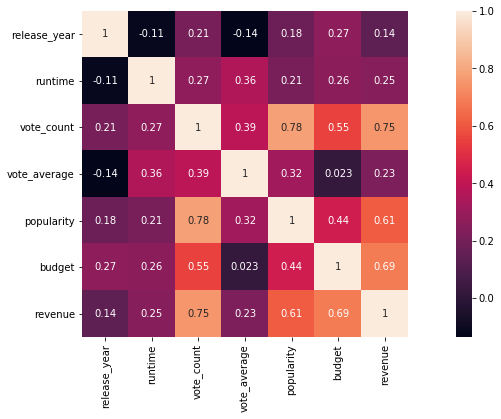

In [62]:
plt.figure(figsize = (17,6));
corr = df[ordered_columns[1:]].corr()
sns.heatmap(corr,annot = True,square = True);

### Revenue and budget shows a strong postive correlation (0.69).

### Popularity and vote count shows a strong positive relation(0.78).

### Popularity and runtime shows a positive relation(0.21). 

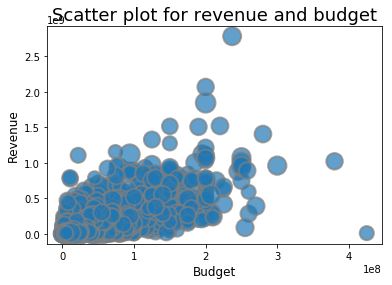

In [63]:
rev_bud=df.query("revenue > 0 & budget > 0")
z = rev_bud['runtime'] 
plt.scatter(x= rev_bud['budget'], y = rev_bud['revenue'],s = z*2,cmap="Blues", alpha = 0.7,edgecolors="grey", linewidth=2);
plt.xlabel('Budget',fontsize = 12);
plt.ylabel('Revenue',fontsize= 12);
plt.title("Scatter plot for revenue and budget", fontsize = 18);

### Revenue and budget shows a strong postive correlation (0.69).

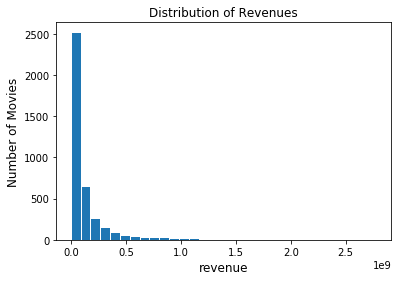

In [64]:
plt.hist(df['revenue'],bins = 31, rwidth = 0.9);
plt.xlabel('revenue', fontsize = 12);
plt.ylabel('Number of Movies', fontsize = 12);
plt.title('Distribution of Revenues', fontsize = 12);

### Revenue has about 2500 movies with zero values in revenue cell  which sure will affect our analysis.

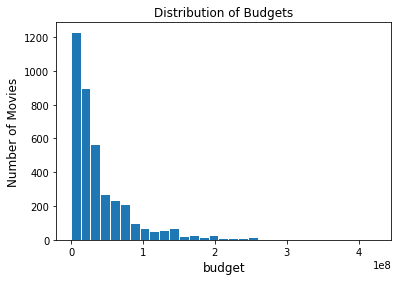

In [65]:
plt.hist(df['budget'],bins = 31, rwidth = 0.9);
plt.xlabel('budget', fontsize = 12);
plt.ylabel('Number of Movies', fontsize = 12);
plt.title('Distribution of Budgets', fontsize = 12);

### Also Budget has about 1200 movies with zero values in budget cell which sure will affect our analysis too.

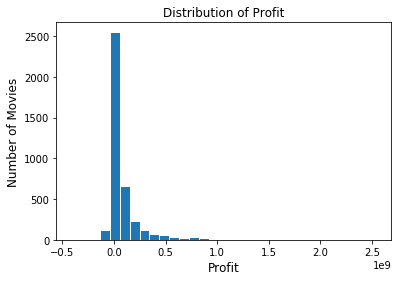

In [66]:
plt.hist(df['Profit'],bins = 31, rwidth = 0.9);
plt.xlabel('Profit', fontsize = 12);
plt.ylabel('Number of Movies', fontsize = 12);
plt.title('Distribution of Profit', fontsize = 12);

### That is why Net Profit also has about 2500 movies with zero values in profit cell.

<a id='conclusions'></a>
## Conclusions


> ## Key Findings:-

>- Drama, Comedy, Thriller, Action & Romance are most produced genres.
>- Roberto De Niro, Samuel L.Jackson & Bruce Willis are actors with most apperances in movies. 
>- Universal Pictures, Warner Bros & Paramount Pictures are most most production companies for movies.
>- 2011, 2013 & 2010 are most three years for releasing movies.
>- September, December & October are most three months in a year for releasing movies.
>- Steven Spielberg, Clint Eastwood & Ridley Scott are most movies directors.
>- Most frequent runtimes are between 90 & 106 minutes.
>- 15 minutes is shortest runtime for a movie and 338 minutes is the longest runtime for a movie.
>- 'Avatar' movie has highest profit and 'The Warrior's Way' has lowest profit.
>- 'The Warrior's Way' movie has highest budget and 'Lost & Found' has lowest budget.
>- 'Avatar' movie has highest revenue and 'Shattered Glass' has lowest revenue.
>- 'The Shawshank Redemption' movie has highest average vote and 'Foodfight!' has lowest average vote.
>- Profit is increasing as year increases.
>- Movies with high revenues also has high budget. 


<a id='limitations'></a>
## Limitations


> Limitations are that the dataset contains too many null and zero values. These zero and null values have to be removed and to remove them I had to remove the whole row which contains zero and null values. Also zero values creates false findings.

In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0